![](http://i67.tinypic.com/2jcbwcw.png)

## Classification

Classification - predicting the discrete class ($y$) of an object from a vector of input features ($\vec x$).  
Models used in this notebook include: Logistic Regression, Support Vector Machines, KNN

**Author List**: Kevin Li

**Original Sources**: http://scikit-learn.org, http://archive.ics.uci.edu/ml/datasets/Iris

**License**: Feel free to do whatever you want to with this code


## Iris Dataset

In [1]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data
Y = iris.target
# type(iris)

In [2]:
print("feature vector shape=", X.shape)
print("class shape=", Y.shape)

('feature vector shape=', (150, 4))
('class shape=', (150,))


In [3]:
print(iris.target_names, type(iris.target_names))
print(iris.feature_names, type(iris.feature_names))

(array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10'), <type 'numpy.ndarray'>)
(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], <type 'list'>)


In [4]:
print type (X)
print X[0:5]
print type (Y)
print Y[0:5]
print "---"
print(iris.DESCR)

<type 'numpy.ndarray'>
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
<type 'numpy.ndarray'>
[0 0 0 0 0]
---
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9

In [5]:
# specifies that figures should be shown inline, directly in the notebook.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


df is a  <class 'pandas.core.frame.DataFrame'>


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


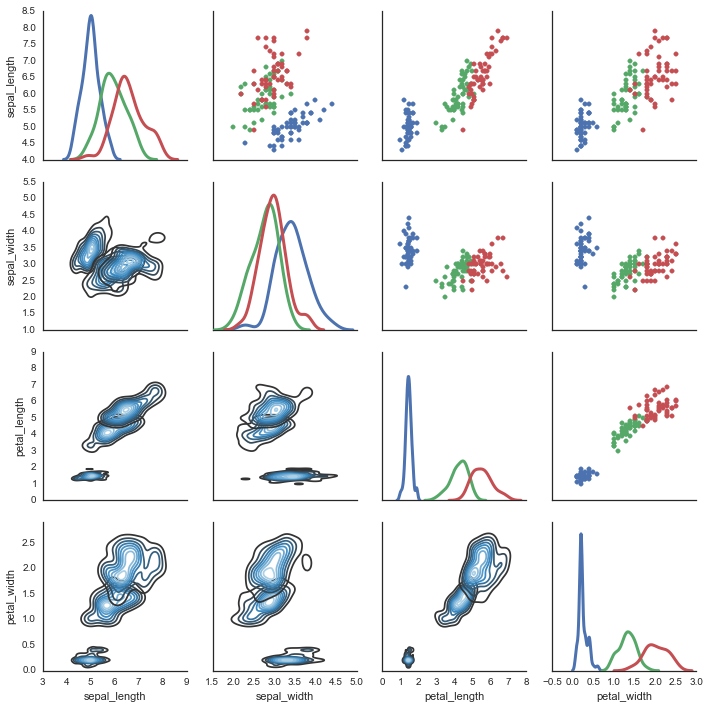

In [6]:
# Learn more about thhis visualization package at http://seaborn.pydata.org/
# http://seaborn.pydata.org/tutorial/axis_grids.html
# http://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

df = sns.load_dataset("iris")
print "df is a ", type(df)

g = sns.PairGrid(df, diag_sharey=False,hue="species")
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [7]:
# sns.load_dataset?
sns.load_dataset

<function seaborn.utils.load_dataset>

 - Logistic Regression:  `linear_model.LogisticRegression`
 - KNN Classification:  `neighbors.KNeighborsClassifier`
 - LDA / QDA:  `lda.LDA` / `lda.QDA`
 - Naive Bayes: `naive_bayes.GaussianNB`
 - Support Vector Machines:   `svm.SVC`
 - Classification Trees:  `tree.DecisionTreeClassifier`
 - Random Forest:  `ensemble.RandomForestClassifier`
 - Multi-class & multi-label Classification is supported: `multiclass.OneVsRest`  `multiclass.OneVsOne` 
 - Boosting & Ensemble Learning: xgboost, cart

## Logistic Regression

A standard logistic sigmoid function
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png" width="50%">

In [8]:
%matplotlib inline

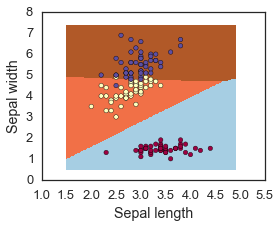

In [9]:
import numpy as np
from sklearn import linear_model, datasets

# set_context
sns.set_context("talk")


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 1:3]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

# https://en.wikipedia.org/wiki/Logistic_regression
logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
# numpy.ravel: Return a contiguous flattened array.

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=get_cmap("Spectral"))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()



## Support Vector Machines (Bell Labs, 1992)

<img src="http://docs.opencv.org/2.4/_images/optimal-hyperplane.png" width="50%">

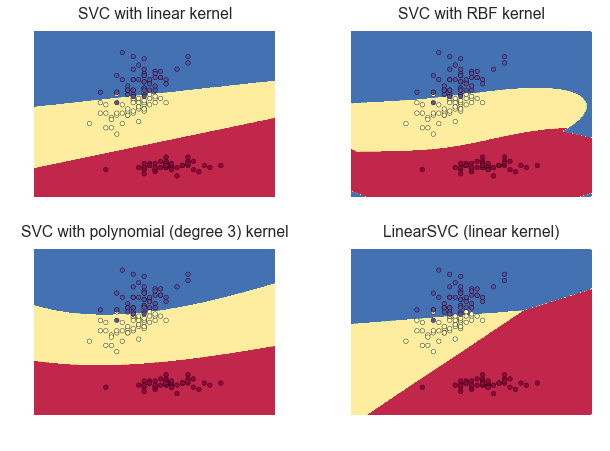

In [10]:
# adapted from http://scikit-learn.org/0.13/auto_examples/svm/plot_iris.html#example-svm-plot-iris-py
%matplotlib inline
import numpy as np
from sklearn import svm, datasets

sns.set_context("talk")

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 1:3]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target

h = 0.02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)
lin_svc = svm.LinearSVC(C=C).fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'LinearSVC (linear kernel)']

clfs = [svc, rbf_svc, poly_svc, lin_svc]

f,axs = plt.subplots(2,2)

for i, clf in enumerate(clfs):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    ax = axs[i//2][i % 2]
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z,cmap=get_cmap("Spectral"))
    ax.axis('off')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=Y,cmap=get_cmap("Spectral"))

    ax.set_title(titles[i])

## Beyond Linear SVM

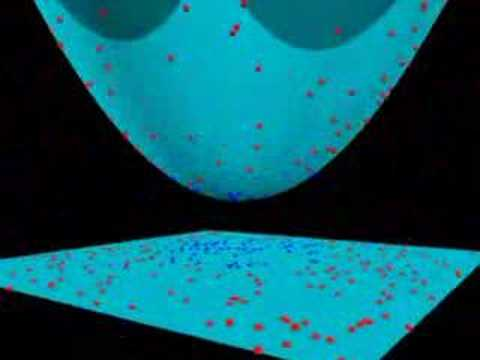

In [11]:
# SVM with polynomial kernel visualization
from IPython.display import YouTubeVideo
YouTubeVideo("3liCbRZPrZA")

## kNearestNeighbors (kNN)


Nearest Neighbors Classification

Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.



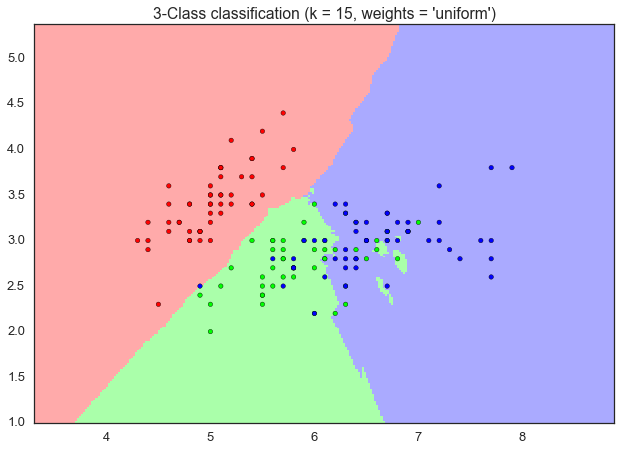

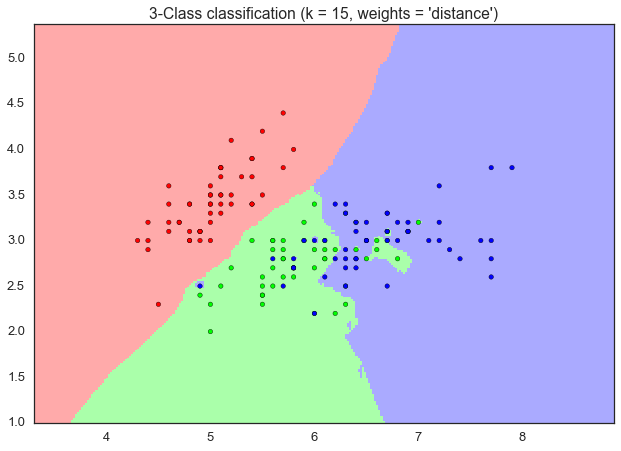

In [12]:
# %load http://scikit-learn.org/stable/_downloads/plot_classification.py
"""
================================
Nearest Neighbors Classification
================================

Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()


##### Back to the Iris Data Set

In [13]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')
print("predicted:", knn.predict(iris_X_test))
print("actual   :", iris_y_test)

('predicted:', array([1, 0, 2, 0, 0, 2, 1, 0, 0, 0]))
('actual   :', array([1, 0, 2, 0, 0, 2, 1, 0, 0, 0]))
